In [12]:
import argparse
import os
import pandas as pd
import numpy as np

from scipy.stats import ks_2samp, wasserstein_distance
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.0

In [13]:
df_train = pd.read_csv('./pointcloud_feature/train_cluster.csv')
df_train

,name,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,video_num,pr_k,test_score,score,cluster
0,akiyama,0.465780,0.402957,0.389172,0.132364,0.244541,0.337340,15.095633,32.455948,1,1.00,4,1.00,1
1,hirai,0.595902,0.559260,0.416372,0.137693,0.126099,0.315228,21.669062,44.831531,1,0.75,3,0.75,1
2,kudo,0.548617,0.526285,0.456227,0.155550,0.199395,0.416809,68.565885,372.028586,1,0.75,3,0.75,1
3,luqman,0.405367,0.424116,0.401714,0.145600,0.256687,0.347286,31.278970,57.554050,1,1.00,4,1.00,1
4,negishi,0.463802,0.436987,0.416048,0.191186,0.287729,0.368006,18.707299,33.179057,1,0.00,3,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,sone,0.445131,0.442574,0.421530,0.178120,0.286135,0.369874,35.803381,59.218091,4,0.50,7,0.25,2
57,sugano,0.453471,0.485776,0.341975,0.132099,0.093711,0.242645,20.069963,36.064296,4,0.75,7,1.00,1
58,suzuki,0.450009,0.441276,0.409442,0.187537,0.299051,0.351426,45.474514,80.647256,4,0.25,6,0.50,0
59,tsuruta,0.608316,0.553448,0.424812,0.139523,0.137551,0.334009,27.172228,54.922726,4,0.75,7,0.75,1


In [14]:
df_test = pd.read_csv('./pointcloud_feature/test_cluster.csv')
print(f"[Test] shape={df_test.shape}")
display(df_test)

[Test] shape=(10, 10)


,ID,zncc_50_dz,zncc_90_dz,zncc_50_dx,zncc_90_dx,zncc_50_dy,zncc_90_dy,centroid_50,centroid_90,cluster
0,hirai,0.254832,0.379771,0.252540,0.390143,0.188492,0.278033,47.568157,109.054695,2
1,sato,0.312681,0.603178,0.250023,0.518122,0.324341,0.551519,26.568934,52.295199,0
2,teraoka,0.217529,0.322244,0.219900,0.324844,0.125069,0.203940,37.140972,77.824612,2
3,tsuruta,0.213186,0.299698,0.207456,0.299672,0.140876,0.217222,36.602751,68.417854,0
4,sone,0.425019,0.558330,0.171481,0.491348,0.249167,0.461485,37.652420,66.721496,1
5,kudo,0.273436,0.368801,0.315851,0.386731,0.227128,0.322229,17.650997,34.126466,1
6,shiraishi,0.209598,0.270362,0.074491,0.426851,0.066554,0.553285,30.768213,53.223859,1
7,sato_s,0.198230,0.303892,0.167359,0.539643,0.174209,0.655801,24.133017,54.788292,1
8,yamamoto,0.317174,0.394601,0.220082,0.646060,0.297129,0.757636,20.720304,40.194771,1
9,kameoka,0.305265,0.415461,0.181651,0.625078,0.208137,0.735975,25.645038,58.185299,0


In [15]:
df_test_old = df_test.iloc[0:6]
df_test_new = df_test.iloc[6:10]

display(df_test_old)
display(df_test_new)

,ID,zncc_50_dz,zncc_90_dz,zncc_50_dx,zncc_90_dx,zncc_50_dy,zncc_90_dy,centroid_50,centroid_90,cluster
0,hirai,0.254832,0.379771,0.252540,0.390143,0.188492,0.278033,47.568157,109.054695,2
1,sato,0.312681,0.603178,0.250023,0.518122,0.324341,0.551519,26.568934,52.295199,0
2,teraoka,0.217529,0.322244,0.219900,0.324844,0.125069,0.203940,37.140972,77.824612,2
3,tsuruta,0.213186,0.299698,0.207456,0.299672,0.140876,0.217222,36.602751,68.417854,0
4,sone,0.425019,0.558330,0.171481,0.491348,0.249167,0.461485,37.652420,66.721496,1
5,kudo,0.273436,0.368801,0.315851,0.386731,0.227128,0.322229,17.650997,34.126466,1


,ID,zncc_50_dz,zncc_90_dz,zncc_50_dx,zncc_90_dx,zncc_50_dy,zncc_90_dy,centroid_50,centroid_90,cluster
6,shiraishi,0.209598,0.270362,0.074491,0.426851,0.066554,0.553285,30.768213,53.223859,1
7,sato_s,0.198230,0.303892,0.167359,0.539643,0.174209,0.655801,24.133017,54.788292,1
8,yamamoto,0.317174,0.394601,0.220082,0.646060,0.297129,0.757636,20.720304,40.194771,1
9,kameoka,0.305265,0.415461,0.181651,0.625078,0.208137,0.735975,25.645038,58.185299,0


In [16]:
feature_cols = [
        "zncc_90_dx","zncc_90_dy","zncc_90_dz",
        "zncc_50_dx","zncc_50_dy","zncc_50_dz",
        "centroid_50","centroid_90"
    ]

In [17]:
# メトリクスを保存するリスト
metrics_list = []

In [18]:
# 結果を保存するディレクトリの作成
output_dir = "./result/cdf/old_new/"
os.makedirs(output_dir, exist_ok=True)

In [19]:
def compute_discrete_cdf(values):
    """
    離散データを想定した簡易CDF(経験的累積分布関数)。
    ソートしたユニーク値 x と、CDF y を返す。
    """
    clean_vals = values[~np.isnan(values)]
    if len(clean_vals) == 0:
        return np.array([]), np.array([])
    
    sorted_vals = np.sort(clean_vals)
    unique_vals = np.unique(sorted_vals)
    cdf_vals = []
    n = len(sorted_vals)
    for uv in unique_vals:
        cdf_vals.append(np.sum(sorted_vals <= uv) / n)
        
    return unique_vals, np.array(cdf_vals)

In [20]:
def evaluate_distribution_difference(
    old_values, 
    new_values, 
    feature_name, 
    output_dir, 
    scaler=None, 
    plot=True, 
    normalize_metrics=False
):
    """
    古いデータと新しいデータの分布の違いを数値で評価し、オプションでCDFをプロットする関数。
    特徴量ごとのスケーリングを考慮します。

    Parameters:
    - old_values (array-like): 古いデータの値
    - new_values (array-like): 新しいデータの値
    - feature_name (str): 特徴量の名前（プロットタイトルやファイル名に使用）
    - output_dir (str): プロットを保存するディレクトリのパス
    - scaler (sklearn.preprocessing scaler instance): スケーリングのためのスケーラー。指定しない場合はMin-Maxスケーラーを使用。
    - plot (bool): CDFプロットを作成・保存するかどうか
    - normalize_metrics (bool): メトリクスをスケーリング前の範囲で正規化するかどうか

    Returns:
    - dict: KS統計量、KS p値、Wasserstein距離を含む辞書
    """
    # スケーリングの設定
    if scaler is None:
        scaler = MinMaxScaler()
    
    # データを縦に結合してスケーリング
    combined_values = np.concatenate([old_values, new_values]).reshape(-1, 1)
    scaler.fit(combined_values)
    
    old_scaled = scaler.transform(old_values.reshape(-1, 1)).flatten()
    new_scaled = scaler.transform(new_values.reshape(-1, 1)).flatten()
    
    # 分布の違いを数値で評価
    ks_stat, ks_p = ks_2samp(old_scaled, new_scaled)
    wass_dist = wasserstein_distance(old_scaled, new_scaled)
    
    metrics = {
        "KS Statistic": ks_stat,
        "KS p-value": ks_p,
        "Wasserstein Distance": wass_dist
    }
    
    # 元のスケールでのメトリクス正規化（オプション）
    if normalize_metrics:
        feature_range = scaler.data_max_ - scaler.data_min_
        if feature_range != 0:
            metrics["KS Statistic"] /= feature_range
            metrics["Wasserstein Distance"] /= feature_range
    
    if plot:
        # CDFの計算（スケーリング後）
        x_old, cdf_old = compute_discrete_cdf(old_scaled)
        x_new, cdf_new = compute_discrete_cdf(new_scaled)
        
        # CDFのプロット
        plt.figure(figsize=(10,6))
        plt.step(x_old, cdf_old, where='post', label='Old CDF', linestyle='-', marker='o')
        plt.step(x_new, cdf_new, where='post', label='New CDF', linestyle='--', marker='s')
        
        plt.xlabel(f"{feature_name} (Scaled)")
        plt.ylabel("CDF")
        plt.title(f"CDF of {feature_name} (Old vs New) [Scaled]")
        plt.grid(True)
        plt.legend()
        
        # プロットの保存
        output_path = os.path.join(output_dir, f"{feature_name}_cdf_old_new_scaled.png")
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        plt.close()
    
    return metrics

In [21]:
# スケーラーを各特徴量に対して個別に適用
for feat in feature_cols:
    old_vals = df_test_old[feat].dropna().values
    new_vals = df_test_new[feat].dropna().values
    
    # 関数を使用して分布の違いを評価
    metrics = evaluate_distribution_difference(
        old_values=old_vals,
        new_values=new_vals,
        feature_name=feat,
        output_dir=output_dir,
        scaler=MinMaxScaler(),  # 特徴量ごとにスケーリング
        plot=True,              # プロットを作成・保存する場合はTrue
        normalize_metrics=False # 必要に応じてTrueに設定
    )
    
    # メトリクスをリストに追加
    metrics_entry = {"Feature": feat}
    metrics_entry.update(metrics)
    metrics_list.append(metrics_entry)

# メトリクスをデータフレームに変換
metrics_df = pd.DataFrame(metrics_list)

# メトリクスの表示
display(metrics_df)

,Feature,KS Statistic,KS p-value,Wasserstein Distance
0,zncc_90_dx,0.750000,0.095238,0.454976
1,zncc_90_dy,1.000000,0.009524,0.607920
2,zncc_90_dz,0.333333,0.923810,0.242980
3,zncc_50_dx,0.583333,0.295238,0.312036
4,zncc_50_dy,0.250000,0.995238,0.140506
5,zncc_50_dz,0.500000,0.552381,0.161262
6,centroid_50,0.666667,0.180952,0.319900
7,centroid_90,0.666667,0.180952,0.248943


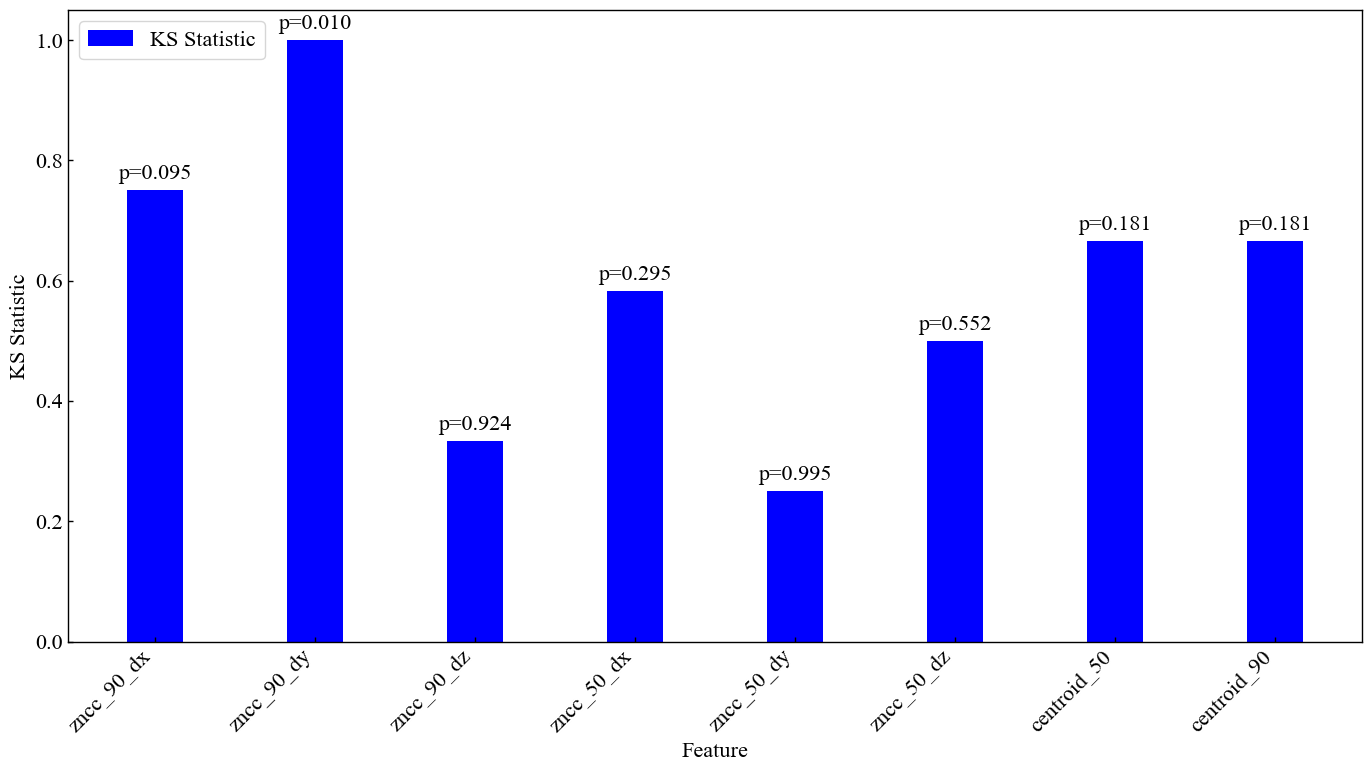

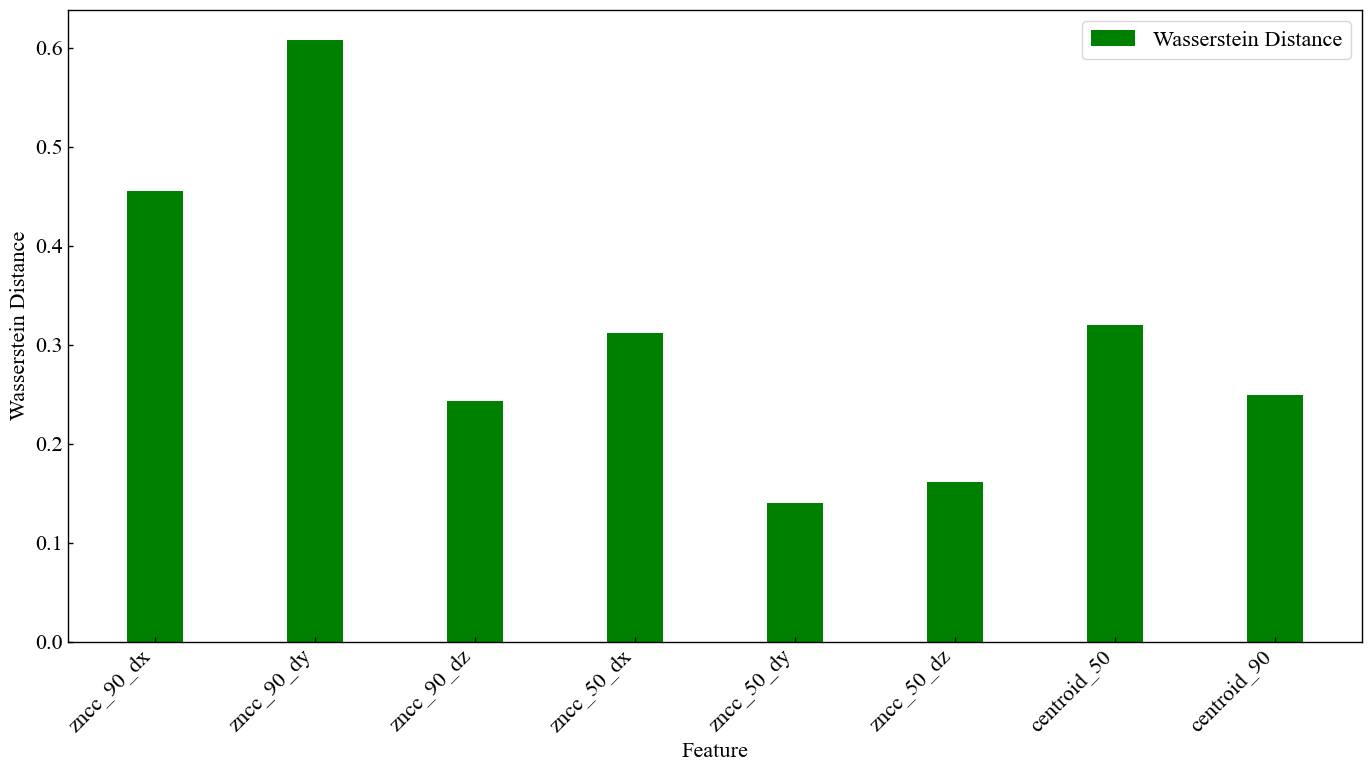

: 

In [ ]:
# メトリクスの可視化（別々のグラフ）
# グラフ1: KS Statistic と p-value
fig, ax1 = plt.subplots(figsize=(14, 8))

# 棒グラフの幅
bar_width = 0.35
indices = np.arange(len(metrics_df))

# KS統計量のバー
ks_bars = ax1.bar(indices, metrics_df["KS Statistic"], bar_width, label='KS Statistic', color='b')

ax1.set_xlabel('Feature')
ax1.set_ylabel('KS Statistic')
ax1.tick_params(axis='y')
ax1.set_xticks(indices)
ax1.set_xticklabels(metrics_df["Feature"], rotation=45, ha='right')

# p値の注釈を追加
for idx, p_val in enumerate(metrics_df["KS p-value"]):
    ax1.text(idx, metrics_df["KS Statistic"].iloc[idx] + 0.01, 
            f'p={p_val:.3f}', 
            ha='center', va='bottom', fontsize=16)

# 凡例の追加
ax1.legend(loc='upper left')

# タイトルの追加
# plt.title('KS Statistic by Feature with p-values')

# プロットの保存
ks_plot_path = os.path.join(output_dir, "ks_statistic_with_pvalues.png")
plt.tight_layout()
plt.savefig(ks_plot_path, dpi=150, bbox_inches='tight')
plt.show()

# グラフ2: Wasserstein Distance
plt.figure(figsize=(14, 8))

# Wasserstein距離のバー
wass_bars = plt.bar(indices, metrics_df["Wasserstein Distance"], bar_width, label='Wasserstein Distance', color='g')

plt.xlabel('Feature')
plt.ylabel('Wasserstein Distance')
plt.tick_params(axis='y')
plt.xticks(indices, metrics_df["Feature"], rotation=45, ha='right')

# 凡例の追加
plt.legend(loc='upper right')

# タイトルの追加
# plt.title('Wasserstein Distance by Feature')

# プロットの保存
wass_plot_path = os.path.join(output_dir, "wasserstein_distance.png")
plt.tight_layout()
plt.savefig(wass_plot_path, dpi=150, bbox_inches='tight')
plt.show()